In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem -1.1: Dataset Exploration and Overview
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/2434750_SonishmaBasnet/WHR-2024-5CS037.csv')

# Display first 10 rows
data_head = data.head(10)
print("First 10 rows:\n", data_head)

# Number of rows and columns
num_rows, num_cols = data.shape
print(f"\nNumber of rows: {num_rows}, Number of columns: {num_cols}")

# List of columns and their data types
print("\nColumns and data types:\n", data.dtypes)

First 10 rows:
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.7

In [ ]:
# Basic statistics
#Mean, median and standard deviation for score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
print(f"\nMean Score: {mean_score}, Median Score: {median_score}, Std Dev: {std_score}")

# Country with highest and lowest hapiness scores
highest_score_country = data.loc[data['score'].idxmax()]['Country name']
lowest_score_country = data.loc[data['score'].idxmin()]['Country name']
print(f"\nCountry with Highest Happiness Score: {highest_score_country}, Country with Lowest Happiness Score: {lowest_score_country}")



Mean Score: 5.52758041958042, Median Score: 5.785, Std Dev: 1.1707165099442995

Country with Highest Happiness Score: Finland, Country with Lowest Happiness Score: Afghanistan


In [ ]:
# Missing values
data_missing = data.isnull().sum()
print("\nMissing Values:\n", data_missing)


Missing Values:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# Filtering countries
# Countries with score > 7.5
high_score_countries = data[data['score'] > 7.5]
print("\nCountries with score > 7.5:\n", high_score_countries)

# Sorting the filtered dataset by GDP per capita (Descending)
high_score_sorted = high_score_countries.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 countries sorted by GDP per capita:\n", high_score_sorted)


Countries with score > 7.5:
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

Top 10 countries sorted by GDP per capita:
   Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   


In [ ]:
# Adding Happiness Category column
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nData with Happiness Category:\n", data.head())



Data with Happiness Category:
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4                    0.740                         0.641       0.153   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.546                2.082               High  
1                      0.5

<ipython-input-5-4a369ffe2095>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top10_happiest, palette='pink')


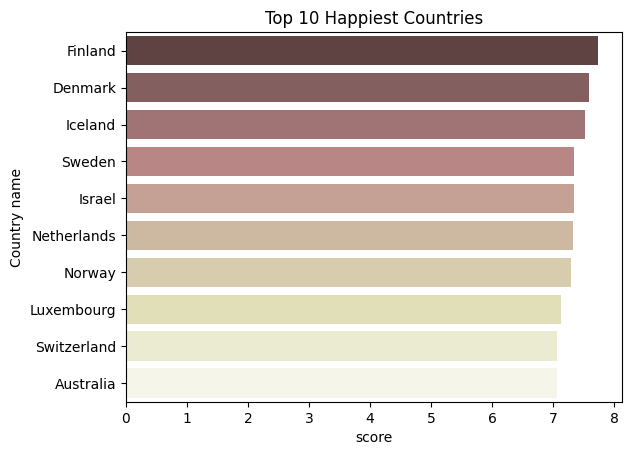

In [ ]:
# Problem -1.2: Data visualizations

# Bar Plot: Top 10 happiest countries
top10_happiest = data.nlargest(10, 'score')
sns.barplot(x='score', y='Country name', data=top10_happiest, palette='pink')
plt.title('Top 10 Happiest Countries')
plt.show()

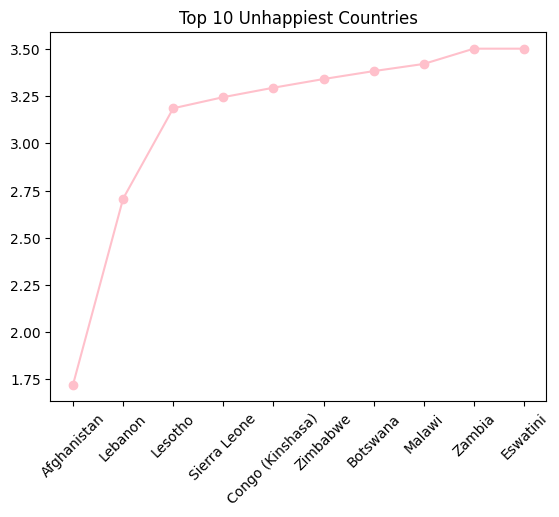

In [ ]:
# Line Plot: Top 10 unhappiest countries
top10_unhappiest = data.nsmallest(10, 'score')
plt.plot(top10_unhappiest['Country name'], top10_unhappiest['score'], marker='o', linestyle='-', color='pink')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.show()

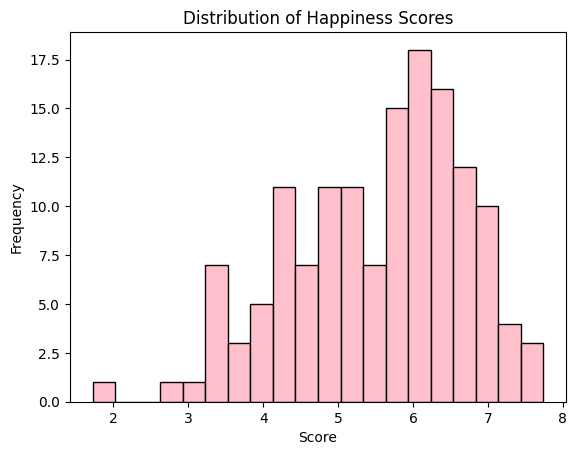

In [ ]:
# Histogram for score
data['score'].plot(kind='hist', bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.show()

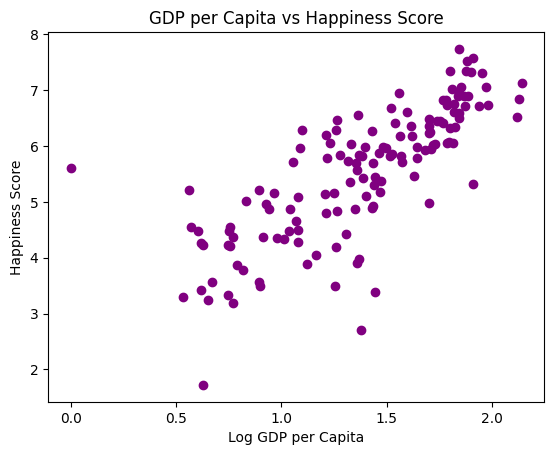

In [ ]:
# Scatter plot: GDP vs Score
plt.scatter(data['Log GDP per capita'], data['score'], color='purple')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [6]:

# Problem -2: Advanced data exploration
# Task 1: Setup Task - Preparing the South-Asia Dataset
# Define South Asian countries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/2434750_SonishmaBasnet/WHR-2024-5CS037.csv')

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"
]

# Filter dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Save the filtered dataset as a separate CSV
south_asia_file = '/content/drive/MyDrive/2434750_SonishmaBasnet/South_Asia_Dataset.csv'
south_asia_data.to_csv(south_asia_file, index=False)



<ipython-input-7-eab0fb8a95b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (


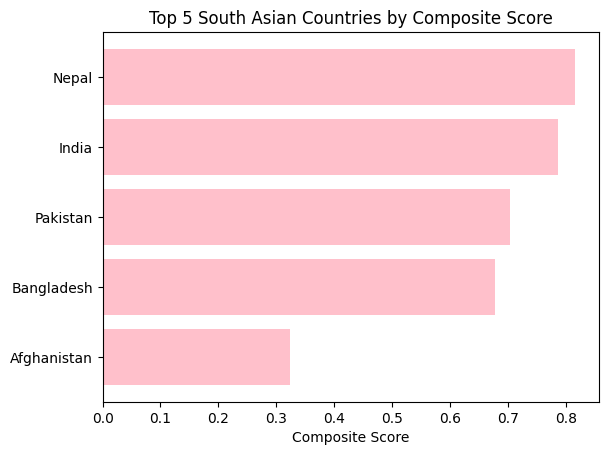

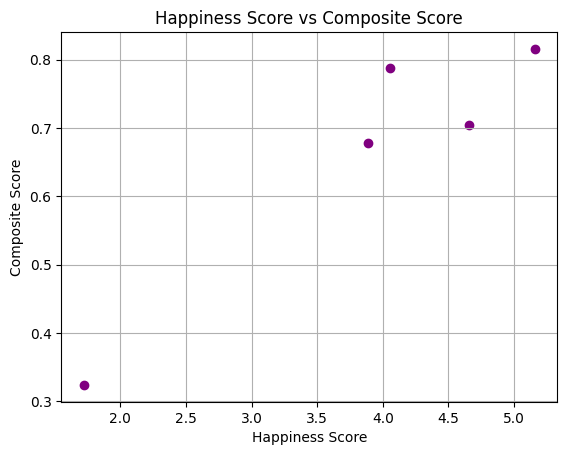

In [7]:
# Task 2: Composite Score Ranking
# Calculate Composite Score
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

# Rank countries by Composite Score
top_composite = south_asia_data.sort_values(by='Composite Score', ascending=False)

# Visualize top 5 countries using a horizontal bar chart
import matplotlib.pyplot as plt

top_5_composite = top_composite.head(5)
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='pink')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

# Compare rankings between Composite Score and original Score
plt.scatter(top_composite['score'], top_composite['Composite Score'], color='purple')
plt.xlabel('Happiness Score')
plt.ylabel('Composite Score')
plt.title('Happiness Score vs Composite Score')
plt.grid()
plt.show()



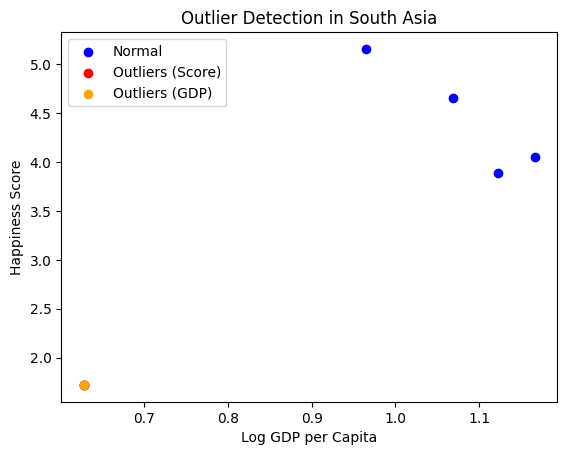

In [8]:
# Task 3: Outlier Detection
# Define outliers using the 1.5 × IQR rule
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_score = detect_outliers(south_asia_data, 'score')
outliers_gdp = detect_outliers(south_asia_data, 'Log GDP per capita')

# Scatter plot highlighting outliers
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], label='Normal', color='blue')
plt.scatter(outliers_score['Log GDP per capita'], outliers_score['score'], label='Outliers (Score)', color='red')
plt.scatter(outliers_gdp['Log GDP per capita'], outliers_gdp['score'], label='Outliers (GDP)', color='orange')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.title('Outlier Detection in South Asia')
plt.show()



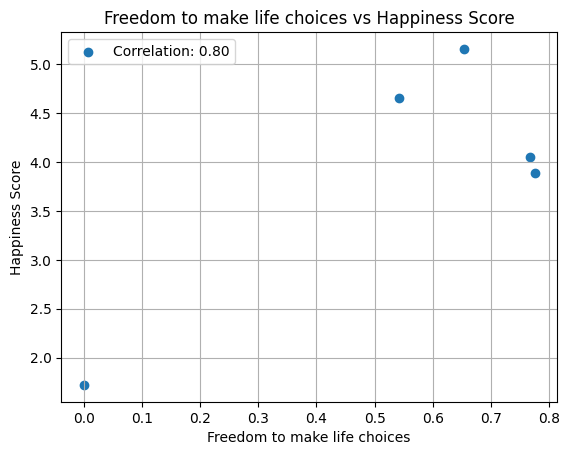

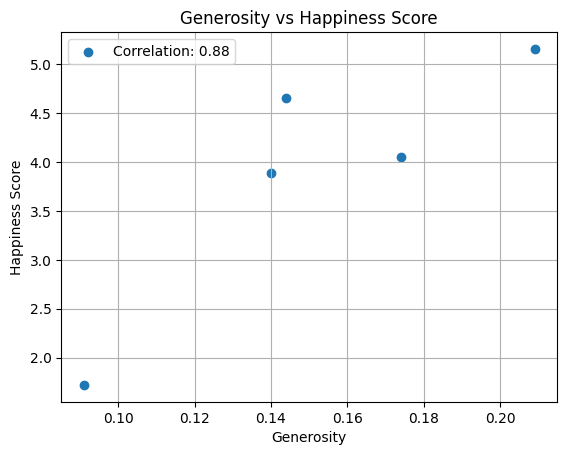

In [9]:
# Task 4: Exploring Trends Across Metrics
# Calculate Pearson correlation for selected metrics
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {metric: south_asia_data[metric].corr(south_asia_data['score']) for metric in metrics}

# Scatter plots with trendlines
for metric in metrics:
    plt.scatter(south_asia_data[metric], south_asia_data['score'], label=f'Correlation: {correlations[metric]:.2f}')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.title(f'{metric} vs Happiness Score')
    plt.legend()
    plt.grid()
    plt.show()



<ipython-input-10-b0b510524d0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


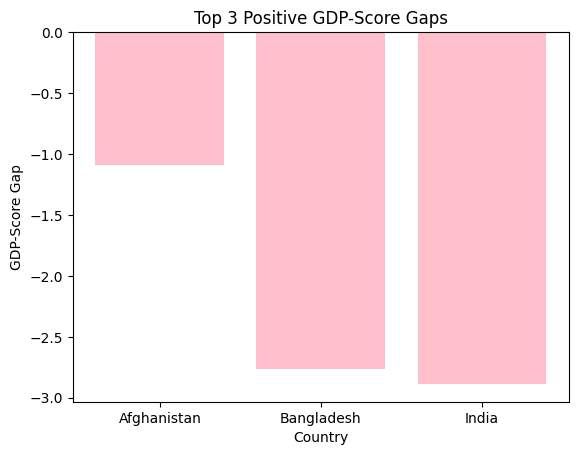

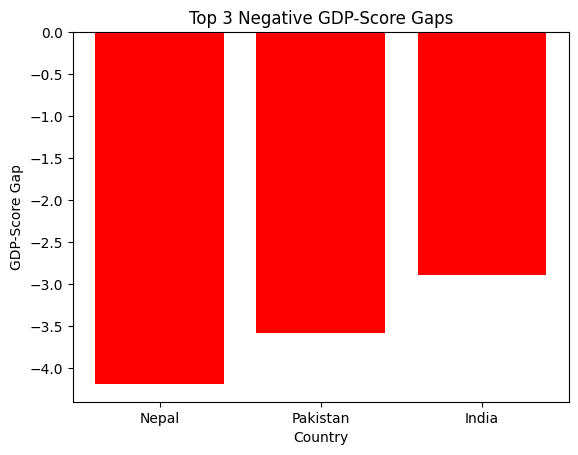

In [10]:
# Task 5: Gap Analysis
# Add GDP-Score Gap column
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Rank countries by gap in both ascending and descending order
top_positive_gap = south_asia_data.nlargest(3, 'GDP-Score Gap')
top_negative_gap = south_asia_data.nsmallest(3, 'GDP-Score Gap')

# Highlight top 3 positive and negative gaps using bar charts
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='pink')
plt.title('Top 3 Positive GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.show()

plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='red')
plt.title('Top 3 Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.show()

# Save South Asia Data with new columns
output_file = '/content/drive/MyDrive/2434750_SonishmaBasnet/South_Asia_Enhanced.csv'
south_asia_data.to_csv(output_file, index=False)


In [11]:
#Problem -3: Comaparative Analysis

# Task 1: Setup Task - Preparing the Middle Eastern Dataset
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# Descriptive Statistics
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

# Identify the region with higher happiness scores
higher_happiness_region = "South Asia" if south_asia_mean > middle_east_mean else "Middle East"


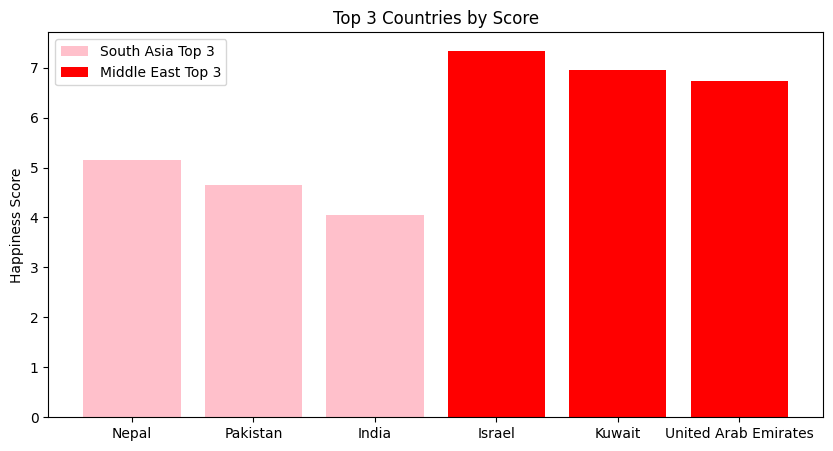

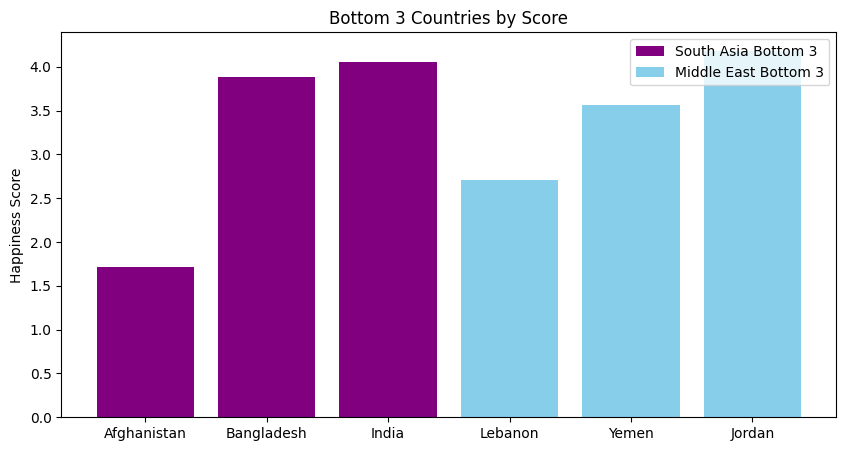

In [12]:
# Top and Bottom Performers
south_asia_top_3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom_3 = south_asia_data.nsmallest(3, 'score')
middle_east_top_3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_data.nsmallest(3, 'score')

# Plot bar charts
plt.figure(figsize=(10, 5))
plt.bar(south_asia_top_3['Country name'], south_asia_top_3['score'], label='South Asia Top 3', color='pink')
plt.bar(middle_east_top_3['Country name'], middle_east_top_3['score'], label='Middle East Top 3', color='red')
plt.title('Top 3 Countries by Score')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(south_asia_bottom_3['Country name'], south_asia_bottom_3['score'], label='South Asia Bottom 3', color='purple')
plt.bar(middle_east_bottom_3['Country name'], middle_east_bottom_3['score'], label='Middle East Bottom 3', color='skyblue')
plt.title('Bottom 3 Countries by Score')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()



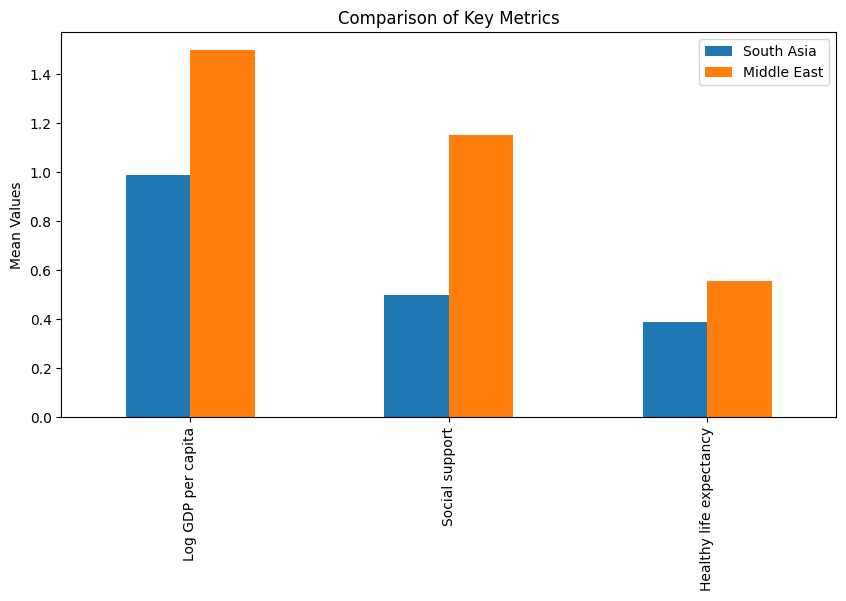

In [13]:
# Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_metrics_south_asia = south_asia_data[metrics].mean()
mean_metrics_middle_east = middle_east_data[metrics].mean()

mean_metrics = pd.DataFrame({
    'South Asia': mean_metrics_south_asia,
    'Middle East': mean_metrics_middle_east
})

mean_metrics.plot(kind='bar', figsize=(10, 5))
plt.title('Comparison of Key Metrics')
plt.ylabel('Mean Values')
plt.show()



In [14]:
# Happiness Disparity
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
south_asia_cv = south_asia_std / south_asia_mean
middle_east_cv = middle_east_std / middle_east_mean



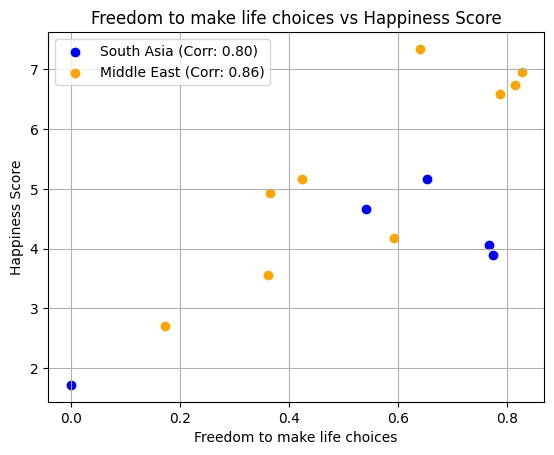

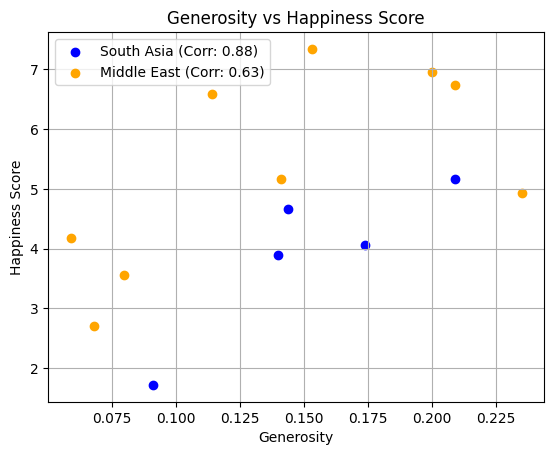

In [15]:
# Correlation Analysis
correlation_metrics = ['Freedom to make life choices', 'Generosity']
correlations_south_asia = {metric: south_asia_data[metric].corr(south_asia_data['score']) for metric in correlation_metrics}
correlations_middle_east = {metric: middle_east_data[metric].corr(middle_east_data['score']) for metric in correlation_metrics}

for metric in correlation_metrics:
    plt.scatter(south_asia_data[metric], south_asia_data['score'], label=f'South Asia (Corr: {correlations_south_asia[metric]:.2f})', color='blue')
    plt.scatter(middle_east_data[metric], middle_east_data['score'], label=f'Middle East (Corr: {correlations_middle_east[metric]:.2f})', color='orange')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.title(f'{metric} vs Happiness Score')
    plt.legend()
    plt.grid()
    plt.show()


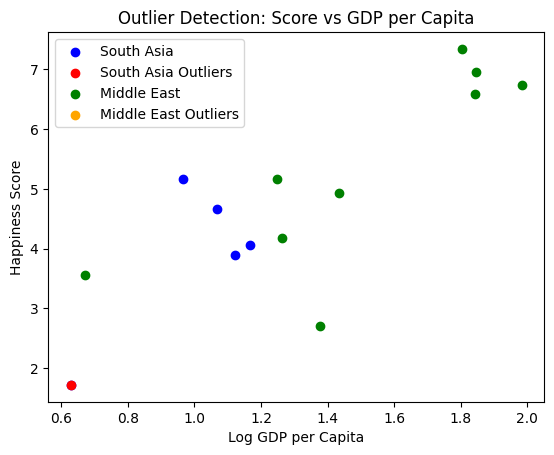

In [17]:

# Outlier Detection
south_asia_outliers = detect_outliers(south_asia_data, 'score')
middle_east_outliers = detect_outliers(middle_east_data, 'score')

plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], label='South Asia', color='blue')
plt.scatter(south_asia_outliers['Log GDP per capita'], south_asia_outliers['score'], label='South Asia Outliers', color='red')
plt.scatter(middle_east_data['Log GDP per capita'], middle_east_data['score'], label='Middle East', color='green')
plt.scatter(middle_east_outliers['Log GDP per capita'], middle_east_outliers['score'], label='Middle East Outliers', color='orange')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.title('Outlier Detection: Score vs GDP per Capita')
plt.show()

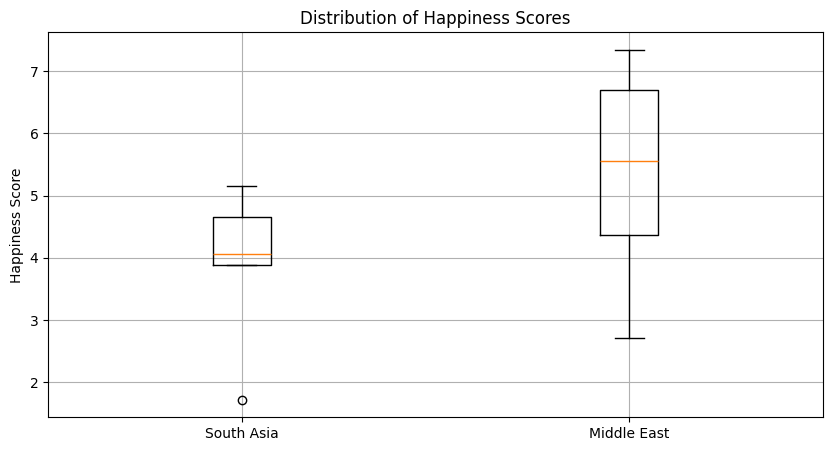

In [16]:

# Visualization: Boxplots
plt.figure(figsize=(10, 5))
data_to_plot = [south_asia_data['score'], middle_east_data['score']]
plt.boxplot(data_to_plot, labels=['South Asia', 'Middle East'])
plt.title('Distribution of Happiness Scores')
plt.ylabel('Happiness Score')
plt.grid()
plt.show()